## Importing Libraries


In [139]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import glob
import os
import pickle
import matplotlib.pyplot as plt

## Reading Database folder using glob and calculating kp and dc 



In [108]:
print("Please choose detector form SIFT AND ORB")
detector_name = input()
print("Choosed Detector:",detector_name)

Please choose detector form SIFT AND ORB
Choosed Detector: ORB


In [109]:
if detector_name == "SIFT":
    detector = cv.SIFT_create()
elif detector_name == "ORB":
    detector = cv.ORB_create()

In [145]:
images_data = []
for img in glob.glob("C:/Users/piyus/OneDrive/Documents/Office/24Sep/storing_keypoints_descriptors_yml/database/*.jpg"):
        n = cv.imread(img)
        kp, dc = detector.detectAndCompute(n, None)
        keypoints = []
        for p in kp:
            temp = (p.pt, p.size, p.angle, p.response, p.octave, p.class_id)
            keypoints.append(temp)

        img_info={
            "image_path" : img,
            "image_name" : os.path.basename(img),
            "image_kp"   : keypoints,
            "image_dp"   : dc
        }
        images_data.append(img_info)

-------------------------------------------------------  # DATABASE LOADED # ----------------------------------------------------------------------

In [168]:
print(len(images_data))

453


### Saving Database in pickle


In [146]:
with open("sources_data.pickle", mode="wb") as f:
    pickle.dump(images_data, f)

# Using stored database for finding 

### Loading query image

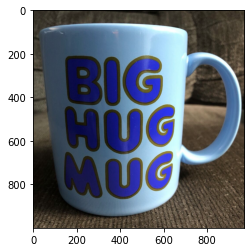

In [167]:
#Load Query image
Query_img = cv.imread("Query.jpg ")
Query_keypoint, Query_descriptor = detector.detectAndCompute(Query_img, None)
plt.imshow(Query_img)

### Getting data from stored file and converting keypoints to objects


In [148]:
def get_sources():
    """Get source's features from file
        Returns:
            sources(list): source's keypoints, descriptors,and img
        """
    #Get feature point information from a file

    with open("sources_data.pickle", mode="rb") as f:
        source = pickle.load(f)
    for items in source:
        
        #Restore keypoints to original structure

        keypoints = []
        for p in items["image_kp"]:
            temp = cv.KeyPoint(
                x=p[0][0],
                y=p[0][1],
                size=p[1],
                angle=p[2],
                response=p[3],
                octave=p[4],
                class_id=p[5],
            )
            keypoints.append(temp)
        items["image_kp"] = keypoints

    return source

In [160]:
images_data_loaded = []
images_data_loaded = get_sources()

# print(images_data_loaded[2])

## Feature Matching


In [165]:
for n in images_data_loaded:
    n["image_dp"] = n["image_dp"].astype(np.float32)
    # bf = cv.BFMatcher()
    # matches = bf.knnMatch(n["image_dp"],Query_descriptor, k=2)
    matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
    matches = matcher.knnMatch(n["image_dp"], Query_descriptor, 2)
    # matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
    # # print(n["image_dp"])
    # knn_matches = matcher.knnMatch(Query_descriptor,n,2)
    #Thin out data
    ratio = 0.5
    matched_keypoints = []
    for m, p in matches:
        if m.distance < ratio * p.distance:
            matched_keypoints.append([m])

    #Output the result image when there are more good than any threshold
    if len(matched_keypoints) > 200:
        print("img found")
        img = cv.imread(n["image_path"])
        plt.imshow(img)
        
            

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-1i5nllza\opencv\modules\flann\src\miniflann.cpp:336: error: (-210:Unsupported format or combination of formats) in function 'cv::flann::buildIndex_'
> type=0
> 